In [1]:
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import pandas as pd
import re

In [2]:
df = pd.read_csv(r"C:\Users\menon\Downloads\get_it_done_pothole_requests_datasd (1).csv")
df_clean = df[['council_district','public_description']].copy()
df_clean

,council_district,public_description
0,2.0,"the entire street is a pothole, and has been f..."
1,9.0,TWO POTHOLES COLLEGE AV N BETWEEN I 8 & CAPRI...
2,4.0,I have submitted multiple requests! Potholes d...
3,7.0,Southbound Lanes of College approaching I-8 we...
4,1.0,This street also has many grooves and potholes...
...,...,...
90962,5.0,Big pothole in the driveway/entrance to the Ra...
90963,2.0,Pothole potentially damaging cars on eastboun...
90964,5.0,Giant pot hole || LOCATION: Rancho Penasquitos...
90965,3.0,STEEL PLATE HAS A CORNER THAT ISN'T SET PROPER...


In [3]:
#making a list of swear words to look for in the comments, while we know we can't
#include every single word, we tried to cover as many as possible while avoiding
#derogatory terms
swears = ['fuck', 'fucker', 'fucking', 'bitch','motherfucker','shit','shitty',
          'shits','asshole','ass','damn', 'crap', 'crappy', 'dick', 'pissed',
          'piss','bullshit','hell']

#cleaning up the columns with no data and making everything lowercase 
#to make filtering easier

df_clean.loc[:,'clean_comment'] = (
    df_clean['public_description'].fillna('').str.lower()
)

#creating a function to count the number of swear words per comment
swears = r'\b(' + '|'.join(map(re.escape, swears)) + r')\b'

#applying the function to the df
df_clean['swear_count'] = df_clean['clean_comment'].str.count(swears)
df_clean['has_swear'] = df_clean['swear_count'] > 0
df_clean

,council_district,public_description,clean_comment,swear_count,has_swear
0,2.0,"the entire street is a pothole, and has been f...","the entire street is a pothole, and has been f...",1,True
1,9.0,TWO POTHOLES COLLEGE AV N BETWEEN I 8 & CAPRI...,two potholes college av n between i 8 & capri...,0,False
2,4.0,I have submitted multiple requests! Potholes d...,i have submitted multiple requests! potholes d...,0,False
3,7.0,Southbound Lanes of College approaching I-8 we...,southbound lanes of college approaching i-8 we...,0,False
4,1.0,This street also has many grooves and potholes...,this street also has many grooves and potholes...,0,False
...,...,...,...,...,...
90962,5.0,Big pothole in the driveway/entrance to the Ra...,big pothole in the driveway/entrance to the ra...,0,False
90963,2.0,Pothole potentially damaging cars on eastboun...,pothole potentially damaging cars on eastboun...,0,False
90964,5.0,Giant pot hole || LOCATION: Rancho Penasquitos...,giant pot hole || location: rancho penasquitos...,0,False
90965,3.0,STEEL PLATE HAS A CORNER THAT ISN'T SET PROPER...,steel plate has a corner that isn't set proper...,0,False


In [4]:
#aggregating the data by council district will allow us to measure the data the way we need
district_count = (
    df_clean.groupby('council_district')
    .agg(
        total_requests=('clean_comment', 'count'),
        total_swears=('swear_count', 'sum'),
        percent_with_swears=('has_swear', 'mean')
    )
    .sort_values('percent_with_swears', ascending=False)
)

In [15]:
vis_true = alt.Chart(district_count.reset_index()).mark_bar().encode(
    x=alt.X('council_district:O', sort='ascending', title='District', axis=alt.Axis(labelAngle=0)),
    y=alt.Y(
        'percent_with_swears:Q',
        title='Percentage of Requests Containing Curse Words',
        axis=alt.Axis(format='%')
    ),
    color=alt.Color('council_district:O', title='District'),
    tooltip=['council_district', 'total_requests', 'total_swears', 'percent_with_swears']
).properties(
    title='Which County Curses the Most in Pothole Requests',
    width=600
)

vis_true

alt.Chart(...)

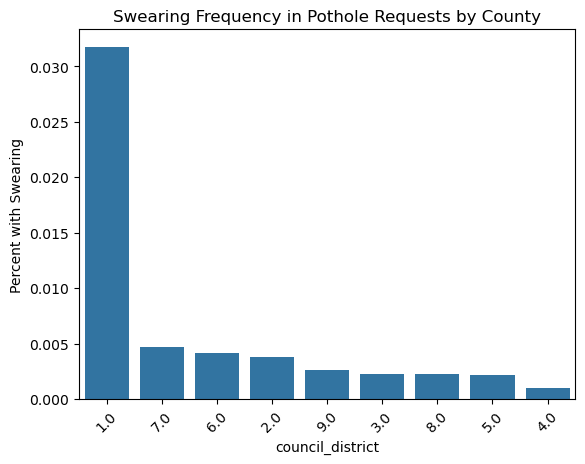

In [13]:
# import seaborn as sns

# sns.barplot(
#     data=district_count.reset_index(), 
#     x='council_district', y='percent_with_swears',
#     order=district_count.reset_index().sort_values('percent_with_swears', ascending=False)['council_district']
# )

# plt.xticks(rotation=45)
# plt.title("Swearing Frequency in Pothole Requests by County")
# plt.ylabel("Percent with Swearing")
# plt.show()
